In [1]:
# Auxiliary Libraries
import numpy as np
import pandas as pd
import itertools
import umap
import random
from tqdm import tqdm

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Dataset
from sklearn.datasets import load_iris

# Import my own methods
from distances import distance, sort_distances
from plotting import immersive_scatter, scatter_clusters, scatter, heatmap, surface, scatter_to_surface
from clusters import grid, boxes, box_clusters, neighbors, similarity_index, intra_cluster_indices, extra_cluster_indices
from auxiliary import normalize, read, one_hot_encoding
from main import main
from mountain_clustering import MountainClustering
from subtractive_clustering import SubtractiveClustering
from kmeans_clustering import KMeansClustering
from fuzzycmeans_clustering import FuzzyCMeansClustering
from spectral_clustering import SpectralClustering

/Users/luisatoro/Desktop/Github/Unsupervised_Learning/venv/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


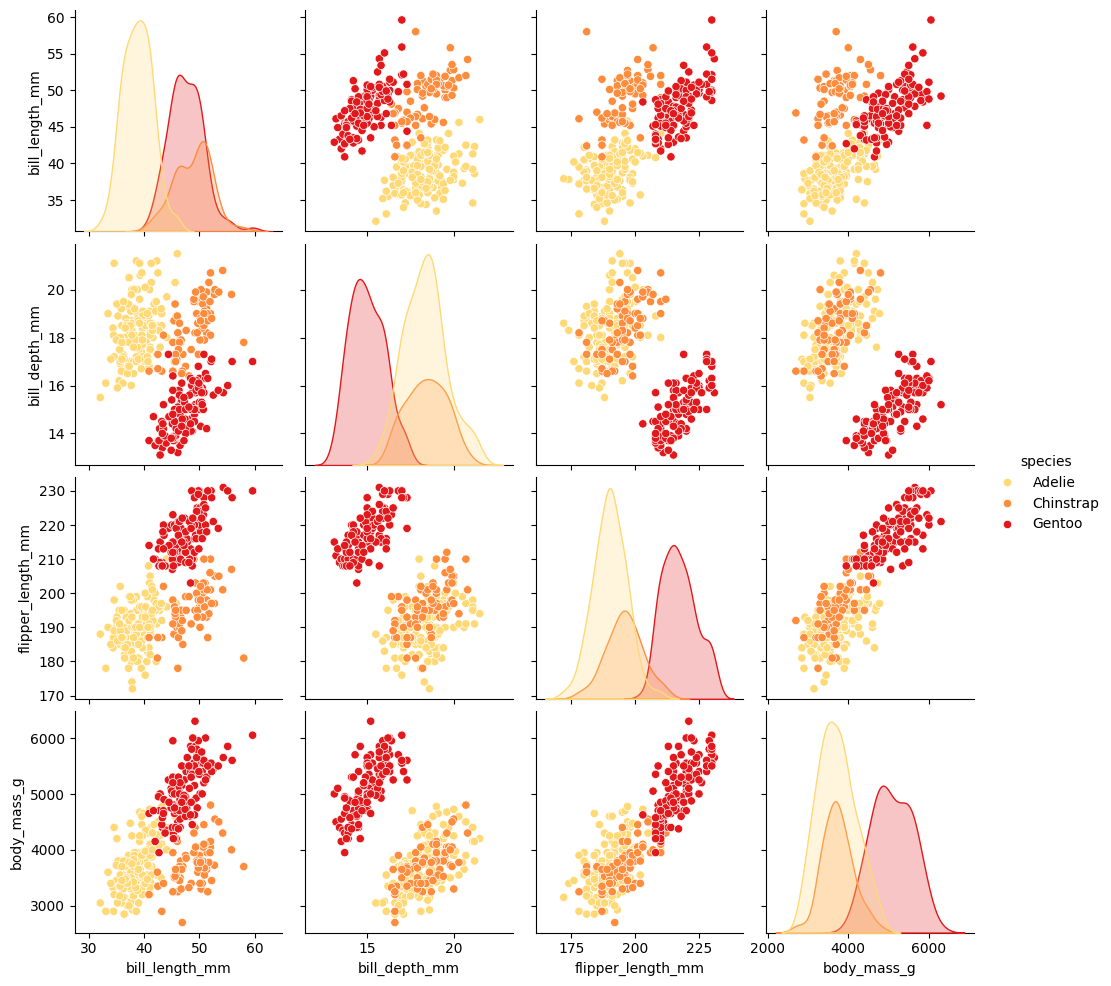

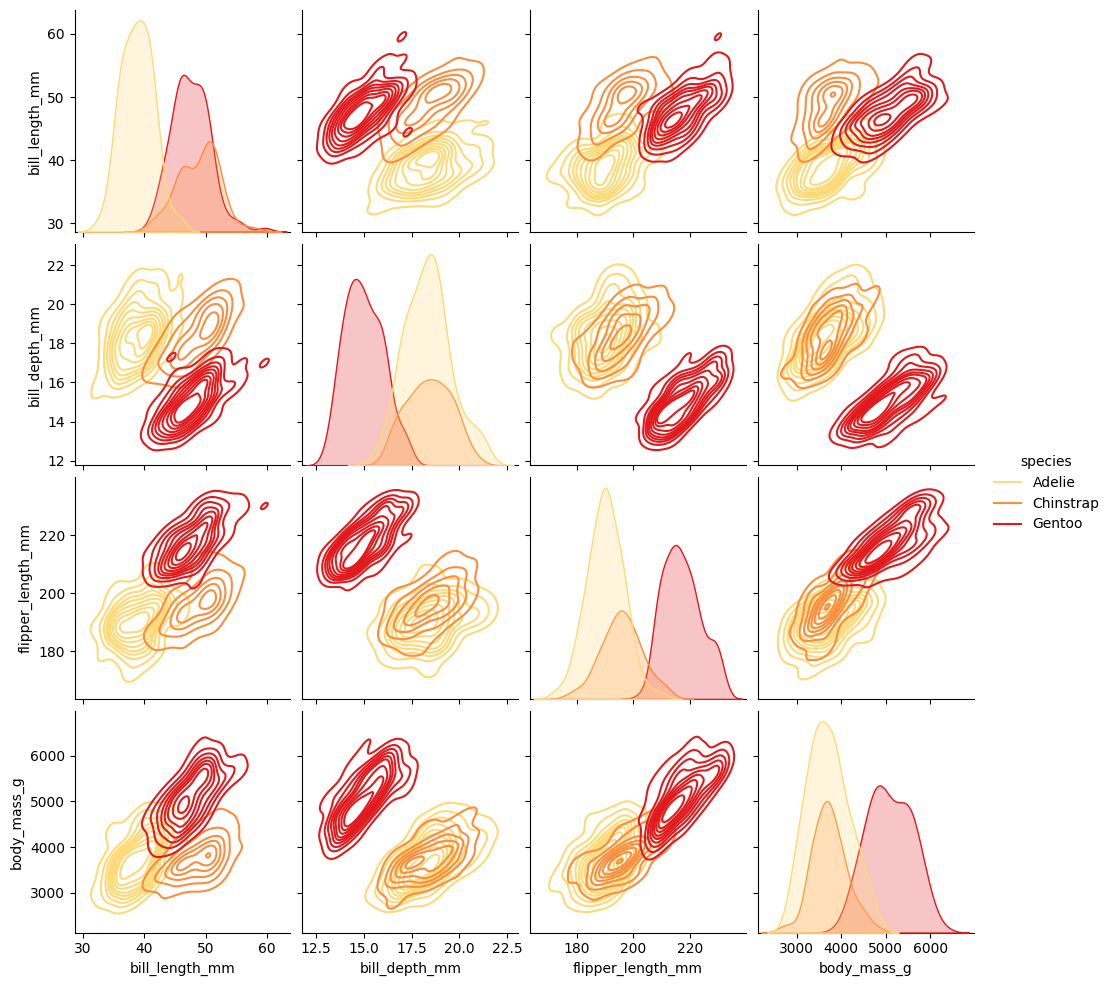

In [2]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
data = np.array([penguins['bill_length_mm'], penguins['bill_depth_mm'], penguins['flipper_length_mm'], penguins['body_mass_g']]).T
norm_data = normalize(data)
target = list(penguins['species'])
penguins_norm = pd.DataFrame(norm_data, columns=['bill length (mm)', 'bill depth (mm)', 'flipper length (mm)', 'body mass (g)'])
penguins_norm['species'] = target


# Store datapoints by cluster
target_clusters = {}
for i in range(len(data)):
    target_i = 'cluster '+ str(target[i])

    if target_i not in target_clusters.keys():
        target_clusters[target_i] = {'points': []}
    target_clusters[target_i]['points'].append(i)

sns.pairplot(penguins, hue='species', palette="YlOrRd")
sns.pairplot(penguins, kind = 'kde', hue='species', palette="YlOrRd")

In [58]:
penguins.describe()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      333.000000     333.000000         333.000000   333.000000
mean        43.992793      17.164865         200.966967  4207.057057
std          5.468668       1.969235          14.015765   805.215802
min         32.100000      13.100000         172.000000  2700.000000
25%         39.500000      15.600000         190.000000  3550.000000
50%         44.500000      17.300000         197.000000  4050.000000
75%         48.600000      18.700000         213.000000  4775.000000
max         59.600000      21.500000         231.000000  6300.000000

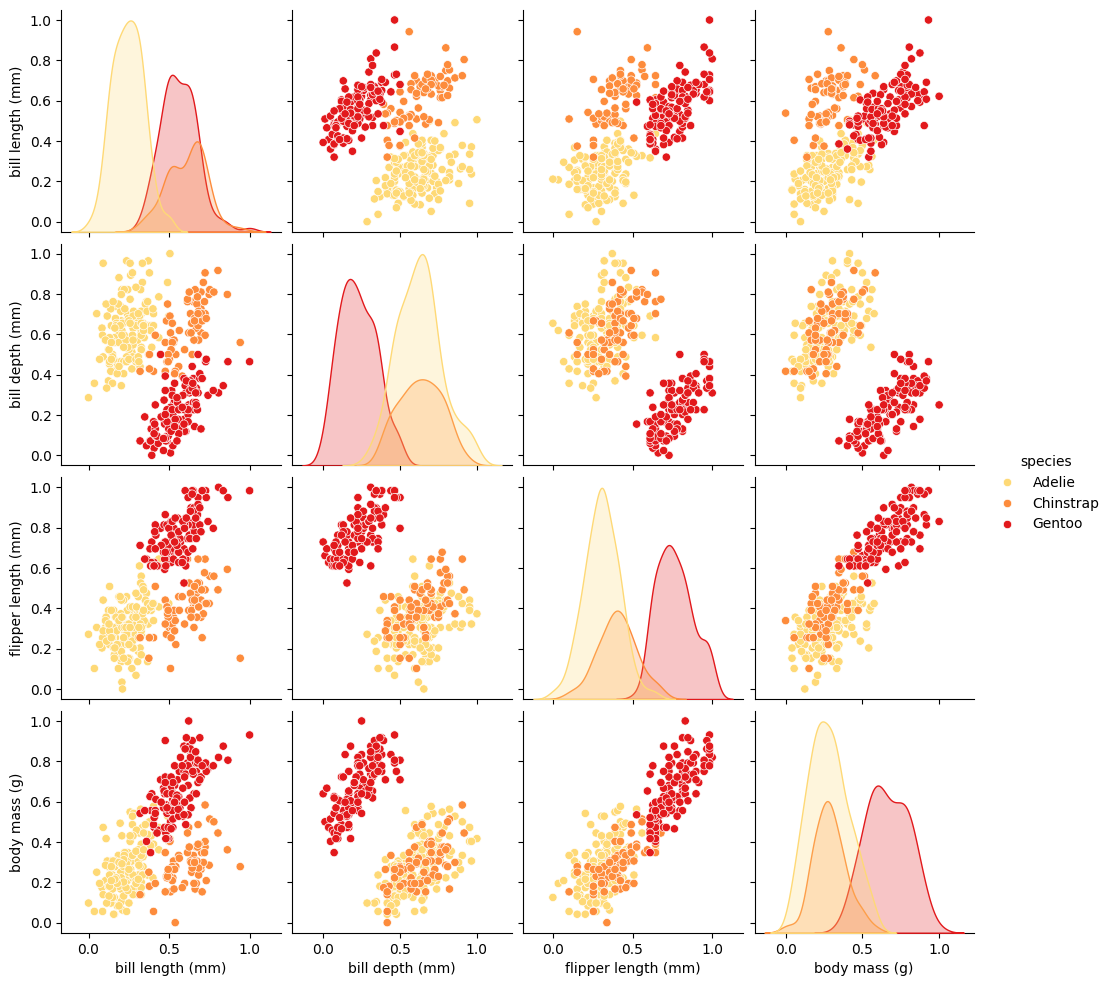

In [41]:
sns.pairplot(penguins_norm, hue='species', palette="YlOrRd")

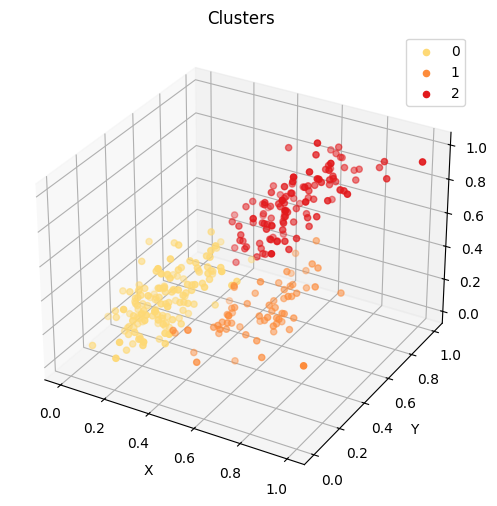

<IPython.core.display.Javascript object>

<style>
canvas#e8208842_d2e9_4dd0_8e11_cd3901f9c043 {
  width: 640px;
  height: 480px;
  background-color: #ffffffff
}
</style>

<canvas width="640" height="480" id="plot_e8208842_d2e9_4dd0_8e11_cd3901f9c043"></canvas>


<script>
  require(['Baby'], function(Baby) {
    function display_e8208842_d2e9_4dd0_8e11_cd3901f9c043() {
        var vis = new Baby.Plots("plot_e8208842_d2e9_4dd0_8e11_cd3901f9c043", {
          backgroundColor: "#ffffffff",
          turntable: false,
          rotationRate: 0.01,
          xScale: 1,
          yScale: 1,
          zScale: 1,
          shapeLegendTitle: "",
          upAxis: false
        });
        vis.Python = true;
        
          
            var coords = [[0.2545454545454545, 0.15254237288135594, 0.2916666666666667], [0.26909090909090905, 0.23728813559322035, 0.3055555555555556], [0.29818181818181805, 0.3898305084745763, 0.1527777777777778], [0.16727272727272732, 0.3559322033898305, 0.20833333333333334], [0.26181818181818167, 0.3050847457627119, 0.2638888888888889], [0.24727272727272717, 0.15254237288135594, 0.2569444444444444], [0.25818181818181823, 0.3898305084745763, 0.5486111111111112], [0.32727272727272727, 0.1694915254237288, 0.1388888888888889], [0.23636363636363636, 0.3220338983050847, 0.3055555555555556], [0.09090909090909091, 0.4406779661016949, 0.4722222222222222], [0.16363636363636364, 0.22033898305084745, 0.2777777777777778], [0.24000000000000005, 0.3898305084745763, 0.20833333333333334], [0.3781818181818181, 0.423728813559322, 0.5], [0.08363636363636354, 0.2033898305084746, 0.1736111111111111], [0.5054545454545454, 0.3728813559322034, 0.4166666666666667], [0.2072727272727271, 0.03389830508474576, 0.19444444444444445], [0.2036363636363637, 0.13559322033898305, 0.25], [0.13818181818181807, 0.288135593220339, 0.3055555555555556], [0.22181818181818186, 0.22033898305084745, 0.3472222222222222], [0.24363636363636348, 0.13559322033898305, 0.3055555555555556], [0.11636363636363621, 0.2542372881355932, 0.3055555555555556], [0.3090909090909091, 0.1864406779661017, 0.2361111111111111], [0.3054545454545454, 0.2542372881355932, 0.1388888888888889], [0.2109090909090908, 0.0, 0.125], [0.3054545454545454, 0.13559322033898305, 0.3472222222222222], [0.26909090909090905, 0.1016949152542373, 0.1527777777777778], [0.1854545454545455, 0.1016949152542373, 0.3333333333333333], [0.26909090909090905, 0.2711864406779661, 0.16666666666666666], [0.3199999999999999, 0.2033898305084746, 0.3333333333333333], [0.15636363636363626, 0.3898305084745763, 0.1736111111111111], [0.25818181818181823, 0.4067796610169492, 0.4027777777777778], [0.24363636363636348, 0.3050847457627119, 0.3472222222222222], [0.3672727272727273, 0.13559322033898305, 0.2361111111111111], [0.2, 0.15254237288135594, 0.16666666666666666], [0.27999999999999986, 0.2033898305084746, 0.5416666666666666], [0.15999999999999995, 0.1694915254237288, 0.125], [0.31636363636363624, 0.3898305084745763, 0.3333333333333333], [0.14181818181818176, 0.23728813559322035, 0.1111111111111111], [0.43636363636363634, 0.4067796610169492, 0.4722222222222222], [0.17818181818181814, 0.22033898305084745, 0.08333333333333333], [0.2727272727272727, 0.3050847457627119, 0.5277777777777778], [0.32727272727272727, 0.1694915254237288, 0.2013888888888889], [0.14181818181818176, 0.3050847457627119, 0.20833333333333334], [0.37090909090909074, 0.3220338983050847, 0.4027777777777778], [0.2727272727272727, 0.23728813559322035, 0.2222222222222222], [0.2909090909090909, 0.2711864406779661, 0.4444444444444444], [0.1054545454545454, 0.3050847457627119, 0.20833333333333334], [0.35999999999999993, 0.4745762711864407, 0.375], [0.08727272727272722, 0.2542372881355932, 0.05555555555555555], [0.3381818181818181, 0.3220338983050847, 0.2777777777777778], [0.25090909090909086, 0.23728813559322035, 0.2361111111111111], [0.3090909090909091, 0.3559322033898305, 0.3055555555555556], [0.15999999999999995, 0.15254237288135594, 0.041666666666666664], [0.2, 0.3728813559322034, 0.29166666666666

In [46]:
scatter_clusters(norm_data, target_clusters, axis= [0,2,3], palette = "YlOrRd")
immersive_scatter(norm_data, target_clusters, axis= [0,2,3], colors = "YlOrRd")

Autoencoder

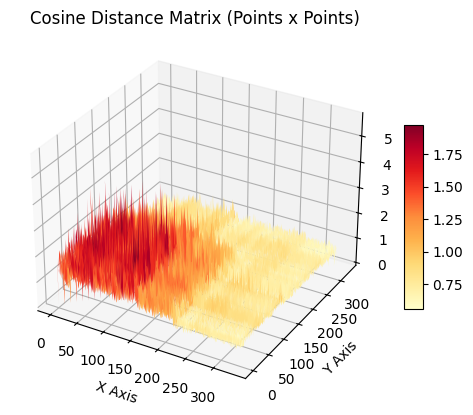

In [6]:
plotting = True
metric = 'cosine'
clusters = 3



# Calculate the distance matrix from all points to all points and plot the heatmap.
D = distance(norm_data, metric = metric)
surface(D, "Cosine Distance Matrix (Points x Points)", colors ="YlOrRd")

11/11 [==============================] - 0s 929us/step


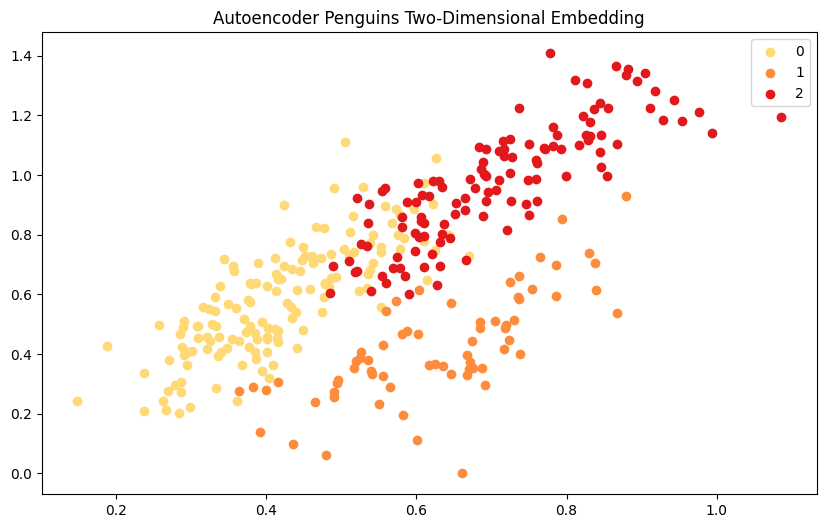

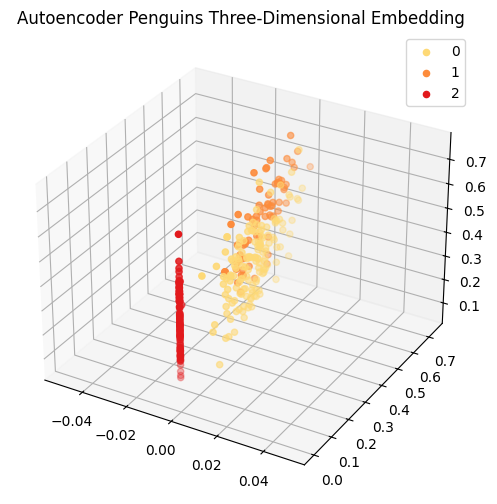

In [154]:
import keras

class Autoencoder(keras.Model):
    def __init__(self, input_shape=(4,), encoded_layers = 3):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = keras.Sequential([
            keras.layers.Dense(encoded_layers, activation='relu', input_shape=input_shape),
        ])

        # Decoder
        self.decoder = keras.Sequential([
            keras.layers.Dense(input_shape[0], activation='linear'),
        ])

    def call(self, inputs):
        encoded = self.encoder(inputs)
        return encoded

# Create the autoencoder
autoencoder_3d = Autoencoder(encoded_layers = 3)

# Compile the autoencoder
autoencoder_3d.compile(optimizer='adam', loss='mse')

embedding_3d = autoencoder_3d.predict(norm_data)

# Create the autoencoder
autoencoder_2d = Autoencoder(encoded_layers = 2)

# Compile the autoencoder
autoencoder_2d.compile(optimizer='adam', loss='mse')

embedding_2d = autoencoder_2d.predict(norm_data)




scatter_clusters(embedding_2d, target_clusters, title = "Autoencoder Penguins Two-Dimensional Embedding", x_label = "", y_label = "", palette = "YlOrRd")
scatter_clusters(embedding_3d, target_clusters, title = "Autoencoder Penguins Three-Dimensional Embedding", x_label = "", y_label = "", z_label = "", palette = "YlOrRd")


11/11 [==============================] - 0s 617us/step


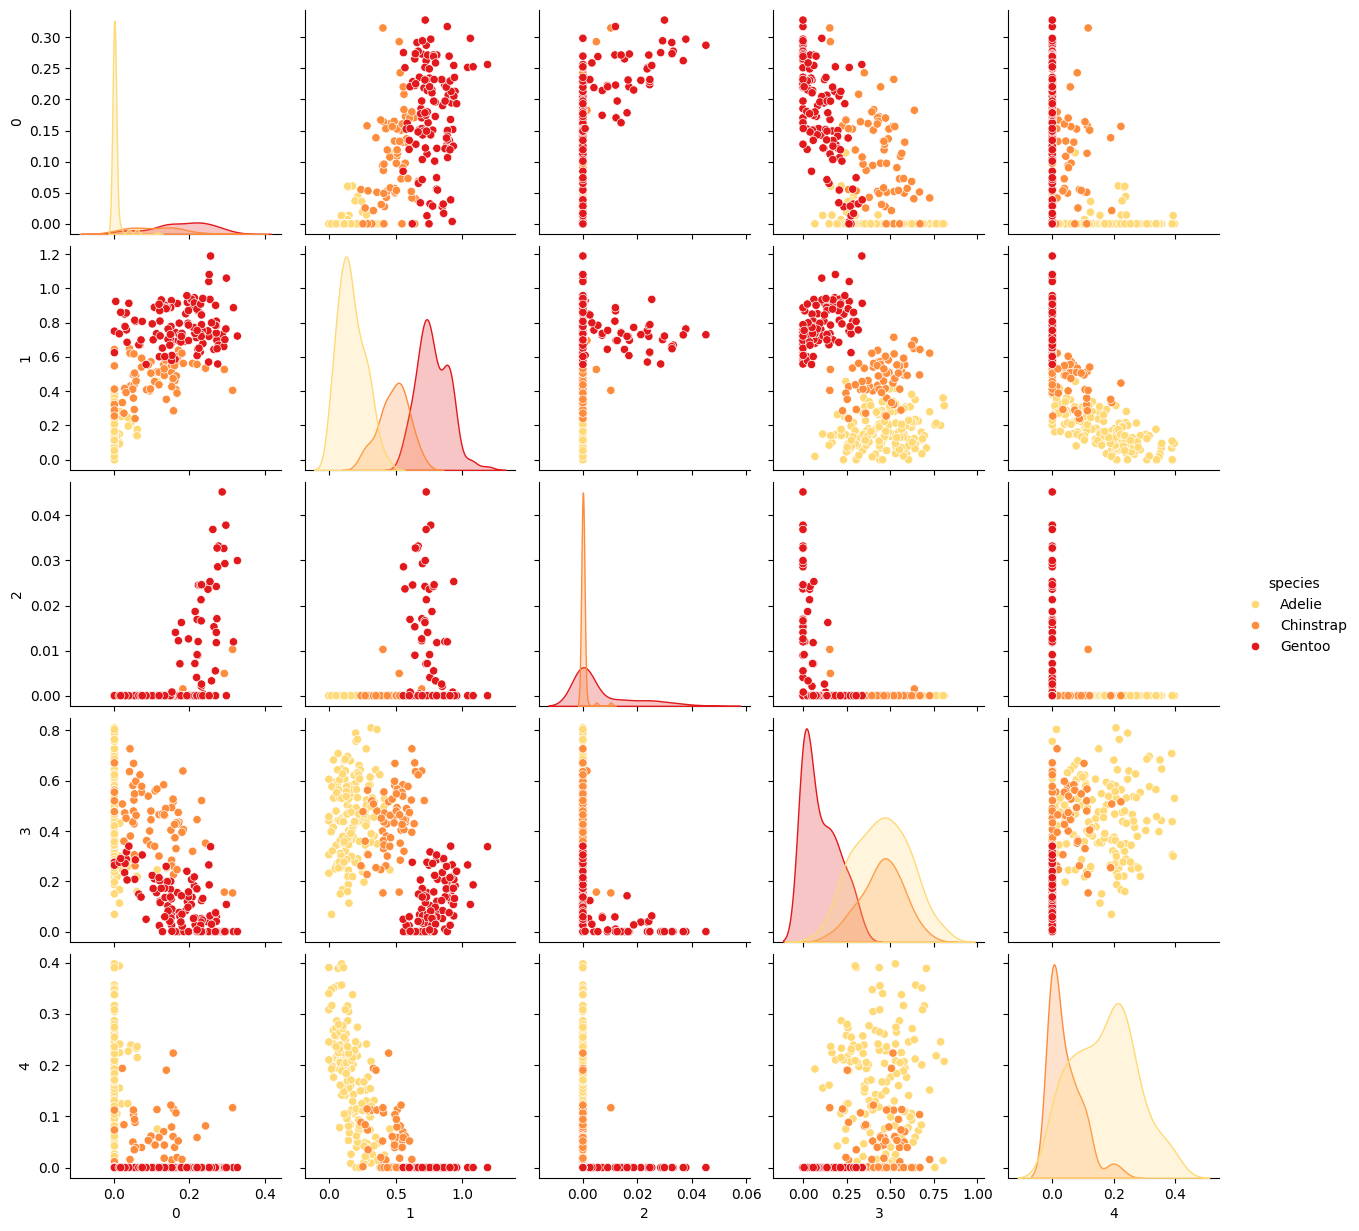

In [157]:
# Create the autoencoder
autoencoder_5d = Autoencoder(encoded_layers = 5)
# Compile the autoencoder
autoencoder_5d.compile(optimizer='adam', loss='mse')

embedding_5d = autoencoder_5d.predict(norm_data)
penguins_5d = pd.DataFrame(embedding_5d)
penguins_5d['species'] = target
sns.pairplot(penguins_5d, hue='species', palette="YlOrRd")


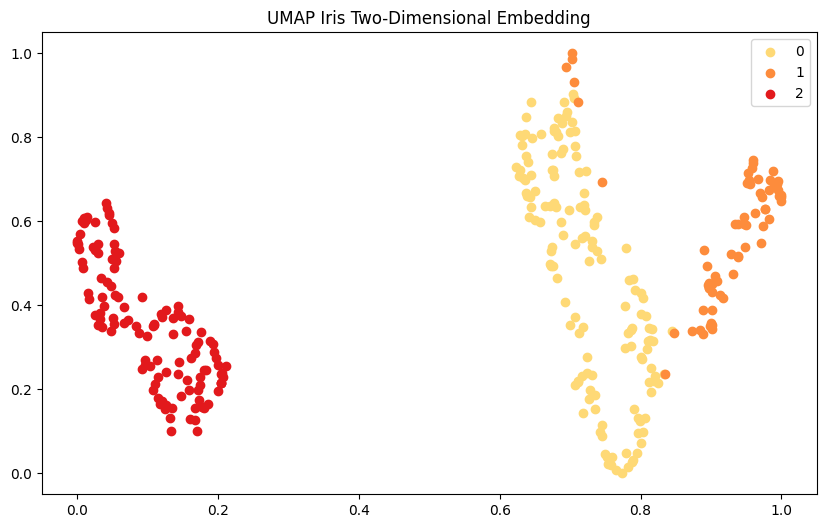

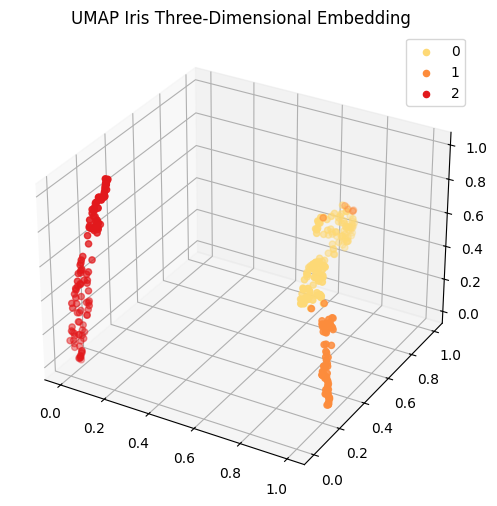

In [136]:
import umap

mapper = umap.UMAP(min_dist=0.1, metric="euclidean", n_components =2).fit(norm_data)
embedding_2d = mapper.embedding_
mapper = umap.UMAP(min_dist=0.1, metric="euclidean", n_components =3).fit(norm_data)
embedding_3d = mapper.embedding_

embedding_2d = normalize(embedding_2d)
embedding_3d = normalize(embedding_3d)

scatter_clusters(embedding_2d, target_clusters, title = "UMAP Iris Two-Dimensional Embedding", x_label = "", y_label = "", palette = "YlOrRd")
scatter_clusters(embedding_3d, target_clusters, title = "UMAP Iris Three-Dimensional Embedding", x_label = "", y_label = "", z_label = "", palette = "YlOrRd")


Clusters

In [60]:
experiment_data = embedding_2d
n_experiments = 1
sigmas = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
G = grid(dim = 2, size = 1/11)
mountain_indexes = np.zeros((len(sigmas),7))
indexes = np.zeros((n_experiments, 3))

for s,sigma in tqdm(enumerate(sigmas), desc="Running experiments"):
    
    for i in range(n_experiments):
        # Mountain
        model = MountainClustering(sigma= sigma)
        # model = SpectralClustering(k=3, sigma = sigma)
        mountain_clusters = model.cluster(experiment_data, G, show = False) 
        indexes[i, 0:3] = intra_cluster_indices(experiment_data, mountain_clusters, show = False)
        # indexes[i, 5:7] = extra_cluster_indices(norm_data, mountain_clusters, target_clusters, show = False)
    mountain_indexes[s, 0] = sigma
    mountain_indexes[s, 1] = sigma*1.25
    mountain_indexes[s, 2:5] = np.round(np.mean(indexes, axis=0),4)

Running experiments: 7it [00:00, 16.03it/s]


In [60]:
def array_to_latex_table(results, headers):
    # Start building the LaTeX table string
    latex_table = "\\begin{table}[h]\n"
    latex_table += "\\centering\n"
    
    # Add the table caption if needed
    latex_table += "\\caption{Your table caption here}\n"
    
    # Begin the tabular environment and specify the column format
    num_columns = len(headers)
    latex_table += "\\begin{tabular}{|" + "c|" * num_columns + "}\n"
    
    # Add the table headers
    latex_table += "\\hline\n"
    for header in headers:
        latex_table += header + " & "
    # Remove the trailing " & "
    latex_table = latex_table[:-2] + "\\\\\n"  # Newline after the headers
    latex_table += "\\hline\n"
    
    # Add the table data
    for row in results:
        for value in row:
            latex_table += f"{value:.3f} & " 
        # Remove the trailing " & "
        latex_table = latex_table[:-2] + "\\\\\n"  # Newline after each row
    
    # End the tabular environment
    latex_table += "\\hline\n"
    latex_table += "\\end{tabular}\n"
    
    # End the table environment
    latex_table += "\\end{table}\n"
    
    return latex_table

print(array_to_latex_table(mountain_indexes[:, [0,1,2,3,4]], [" sigma", "beta","Adjusted Rand Index", "Normalized Mutual Information", "Fowlkes-Mallows Index"]))



\begin{table}[h]
\centering
\caption{Your table caption here}
\begin{tabular}{|c|c|c|c|c|}
\hline
 sigma & beta & Adjusted Rand Index & Normalized Mutual Information & Fowlkes-Mallows Index \\
\hline
0.200 & 0.250 & 0.238 & 0.626 & 122.817 \\
0.300 & 0.375 & 0.517 & 0.682 & 200.887 \\
0.400 & 0.500 & 0.517 & 0.682 & 200.887 \\
0.500 & 0.625 & 0.517 & 0.682 & 200.887 \\
0.600 & 0.750 & 0.517 & 0.682 & 200.887 \\
0.700 & 0.875 & 0.189 & 0.677 & 107.884 \\
0.800 & 1.000 & 0.517 & 0.682 & 200.887 \\
\hline
\end{tabular}
\end{table}



In [24]:
mountain_indexes[:, [0,3,4,5]]

array([[0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561, 0.76496597, 0.79460747],
       [0.50241773, 0.68440561,

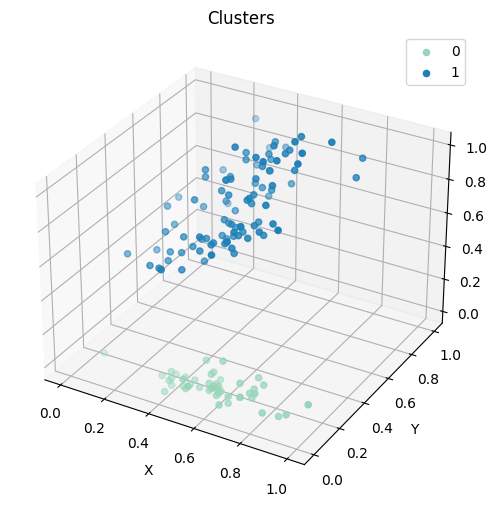

In [26]:
G = grid(dim = 4, size = 1/4)
model = MountainClustering(sigma= 0.1)
mountain_clusters = model.cluster(norm_data, G, show= False) 
scatter_clusters(norm_data, mountain_clusters, axis = [1,2,3])

In [65]:
len(grid(dim = 4, size = 1/3))

256

/var/folders/bq/_pm3gptx09qgc2n6byhqt8zm0000gn/T/ipykernel_19586/1099266373.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = get_cmap("YlOrRd")(np.linspace(0, 1, len(methods)+2))


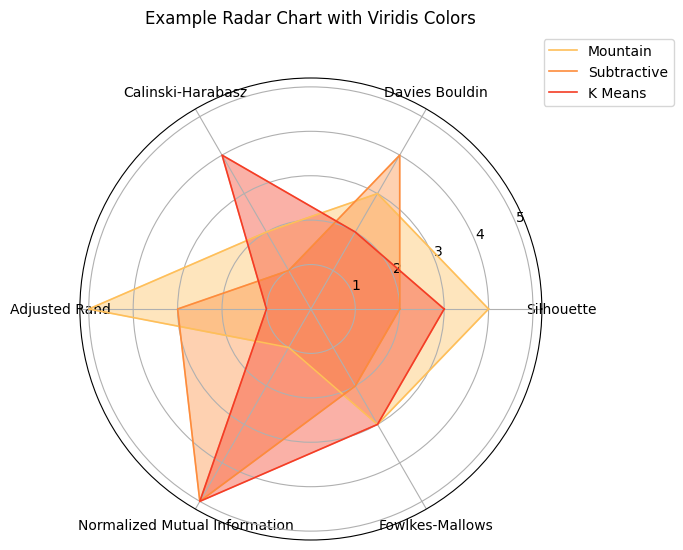

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

def radar_plot(categories, values_list, methods, title='Radar Chart'):
    # Number of categories
    num_categories = len(categories)

    # Compute angle of each axis
    angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()

    # The plot is circular, so we close the plot loop by appending the starting value to the end
    angles += angles[:1]

    # Set color to viridis
    colors = get_cmap("YlOrRd")(np.linspace(0, 1, len(methods)+2))

    # Plot the radar chart for each set of values
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for i, values in enumerate(values_list):
        values += values[:1]
        ax.plot(angles, values, linewidth=1.2, linestyle='solid', color=colors[i+2], label=methods[i])
        ax.fill(angles, values, alpha=0.4, color=colors[i+2])

    # Add labels, legend, and title
    ax.set_thetagrids(np.degrees(angles[:-1]), categories)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.set_title(title, y=1.1)  # Adjust the y-coordinate to leave more space

    # Show the plot
    plt.show()

# Example usage with multiple sets of values
categories = ['Silhouette', 'Davies Bouldin', 'Calinski-Harabasz', 'Adjusted Rand', 'Normalized Mutual Information', 'Fowlkes-Mallows']
values_list = [
    [4, 3, 2, 5, 1, 3],
    [2, 4, 1, 3, 5, 2],
    [3, 2, 4, 1, 5, 3]
]
methods = ['Mountain', 'Subtractive', 'K Means', 'Fuzzy C Means', 'Spectral']

radar_plot(categories, values_list, methods, title='Example Radar Chart with Viridis Colors')


In [158]:
len( grid(dim = 5, size = 1/2))

243

In [164]:
experimental_data = embedding_2d
n_experiments = 10

G = grid(dim = 2, size = 1/15)
D = distance(experimental_data, metric = 'euclidean')

mountain_indexes = np.zeros((n_experiments, 6))
subtractive_indexes = np.zeros((n_experiments, 6))
kmeans_indexes = np.zeros((n_experiments, 6))
fuzzycmeans_indexes = np.zeros((n_experiments, 6))
spectral_indexes = np.zeros((n_experiments, 6))
box_indexes = np.zeros((n_experiments, 6))
neighbor_indexes = np.zeros((n_experiments, 6))

# Mountain
model = MountainClustering()
mountain_clusters = model.cluster(experimental_data, G, show= False) 
mountain_indexes[0, 0:3] = intra_cluster_indices(experimental_data, mountain_clusters, show = False)
mountain_indexes[0, 3:6] = extra_cluster_indices(experimental_data, mountain_clusters, target_clusters, show = False)

# Subtractive
model = SubtractiveClustering(alpha_radius=0.5, max_iterations=100)
subtractive_clusters = model.cluster(experimental_data, show = False)
subtractive_indexes[0, 0:3] = intra_cluster_indices(experimental_data, subtractive_clusters, show = False)
subtractive_indexes[0, 3:6] = extra_cluster_indices(experimental_data, subtractive_clusters, target_clusters, show = False)

for i in tqdm(range(n_experiments), desc="Running experiments"):
    # # Mountain
    # model = MountainClustering()
    # mountain_clusters = model.cluster(experimental_data, G, show= False) 
    # mountain_indexes[i, 0:3] = intra_cluster_indices(experimental_data, mountain_clusters, show = False)
    # mountain_indexes[i, 3:6] = extra_cluster_indices(experimental_data, mountain_clusters, target_clusters, show = False)

    # # Subtractive
    # model = SubtractiveClustering(alpha_radius=0.5, max_iterations=100)
    # subtractive_clusters = model.cluster(experimental_data, show = False)
    # subtractive_indexes[i, 0:3] = intra_cluster_indices(experimental_data, subtractive_clusters, show = False)
    # subtractive_indexes[i, 3:6] = extra_cluster_indices(experimental_data, subtractive_clusters, target_clusters, show = False)

    # KMeans
    model = KMeansClustering(k = 3)
    kmeans_clusters = model.cluster(experimental_data)
    kmeans_indexes[i, 0:3] = intra_cluster_indices(experimental_data, kmeans_clusters, show = False)
    kmeans_indexes[i, 3:6] = extra_cluster_indices(experimental_data, kmeans_clusters, target_clusters, show= False)

    # FuzzyCMeans
    model = FuzzyCMeansClustering(k = 3, m = 2)
    fuzzycmeans_clusters = model.cluster(experimental_data)
    fuzzycmeans_indexes[i, 0:3] = intra_cluster_indices(experimental_data, fuzzycmeans_clusters, show = False)
    fuzzycmeans_indexes[i, 3:6] = extra_cluster_indices(experimental_data, fuzzycmeans_clusters, target_clusters, show = False)

    # Spectral
    model = SpectralClustering(k=3)
    spectral_clusters = model.cluster(experimental_data)
    spectral_indexes[i, 0:3] = intra_cluster_indices(experimental_data, spectral_clusters, show = False)
    spectral_indexes[i, 3:6] = extra_cluster_indices(experimental_data, spectral_clusters, target_clusters, show = False)

    # # Box
    # # D = distance(experimental_data, metric = 'euclidean')
    # box_cluster = box_clusters(boxes(D, div = 3), D) 
    # box_indexes[i, 0:3] = intra_cluster_indices(experimental_data, box_cluster, show = False)
    # box_indexes[i, 3:6] = extra_cluster_indices(experimental_data, box_cluster, target_clusters, show = False)

    # # Neighbors
    # neighbor_clusters = neighbors(D, 3, 0.1)
    # neighbor_indexes[i, 0:3] = intra_cluster_indices(experimental_data, neighbor_clusters, show = False)
    # neighbor_indexes[i, 3:6] = extra_cluster_indices(experimental_data, neighbor_clusters, target_clusters, show = False)

    
    

Running experiments: 100%|██████████| 10/10 [02:01<00:00, 12.11s/it]


/var/folders/bq/_pm3gptx09qgc2n6byhqt8zm0000gn/T/ipykernel_19586/1099266373.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = get_cmap("YlOrRd")(np.linspace(0, 1, len(methods)+2))


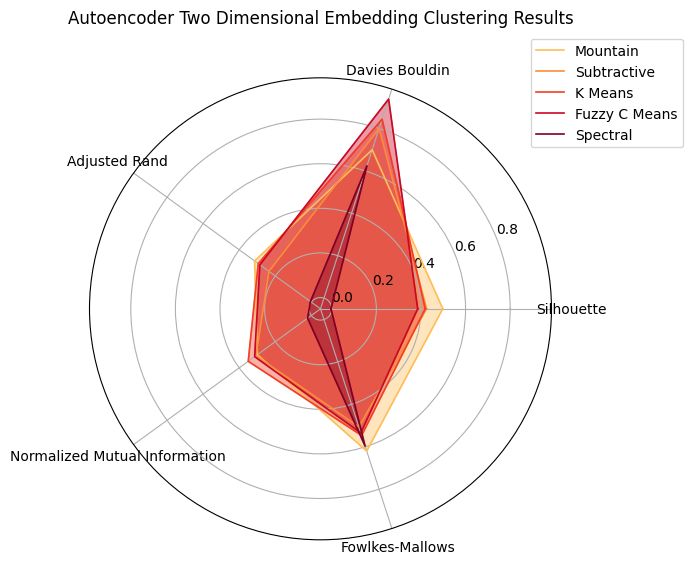

In [165]:
categories = ['Silhouette', 'Davies Bouldin', 'Adjusted Rand', 'Normalized Mutual Information', 'Fowlkes-Mallows']
values_list = [list(mountain_indexes[0,[0,1,3,4,5]]), list(subtractive_indexes[0,[0,1,3,4,5]]), list(np.mean(kmeans_indexes[:,[0,1,3,4,5]],0)), 
               list(np.mean(fuzzycmeans_indexes[:,[0,1,3,4,5]],0)), list(np.mean(spectral_indexes[:,[0,1,3,4,5]],0))
]
methods = ['Mountain', 'Subtractive', 'K Means', 'Fuzzy C Means', 'Spectral']

radar_plot(categories, values_list, methods, title='Autoencoder Two Dimensional Embedding Clustering Results')

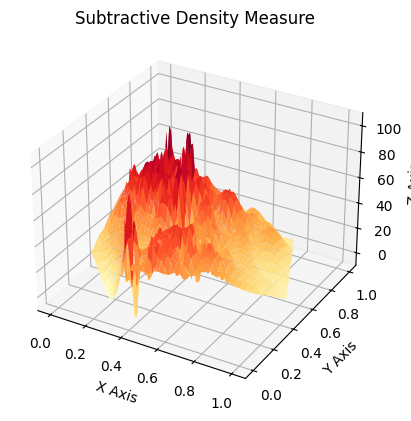

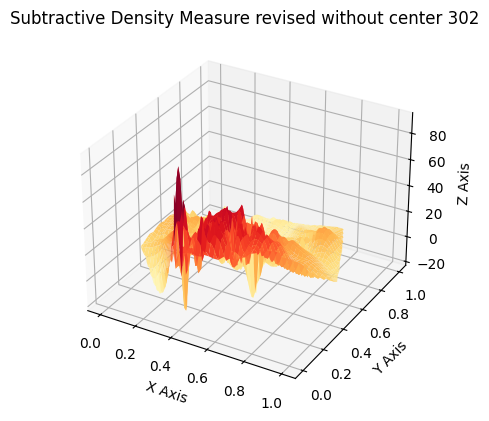

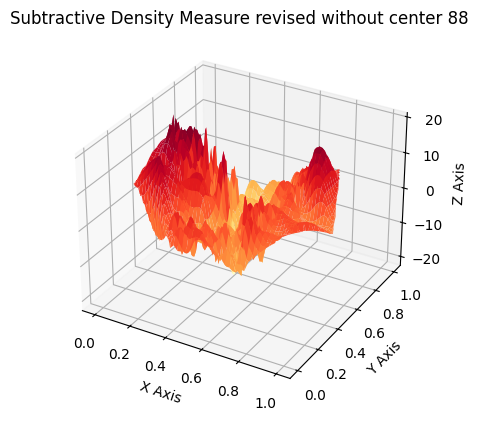

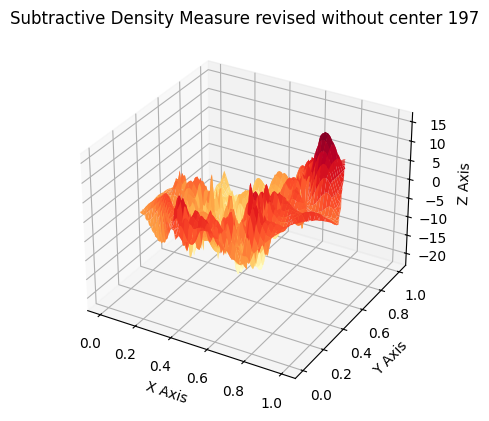

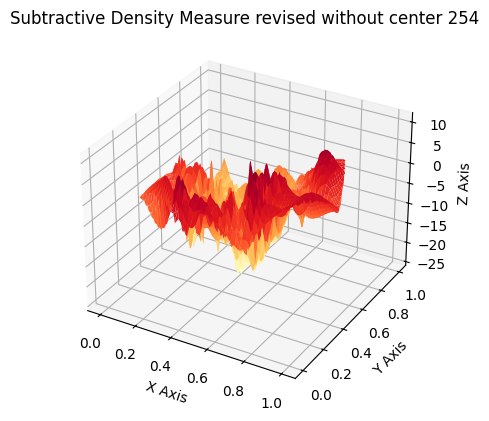

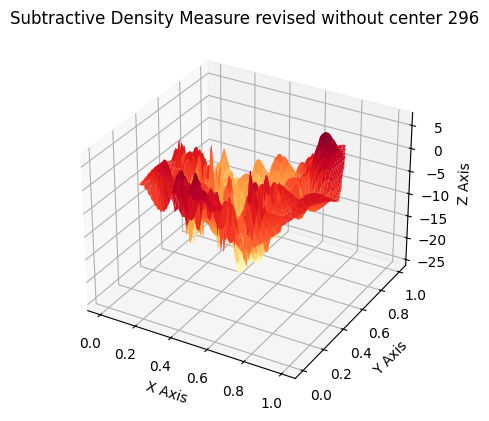

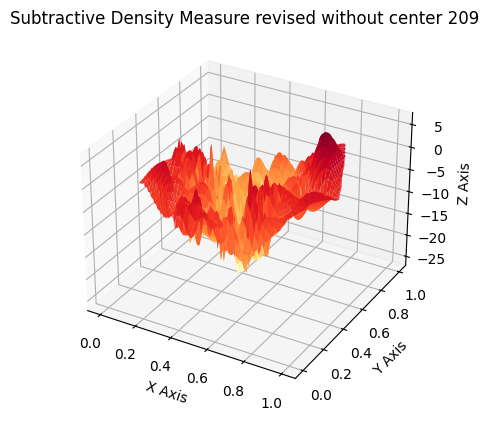

In [3]:

model = SubtractiveClustering()
mountain_clusters = model.cluster(norm_data, show= True, colors = "YlOrRd")

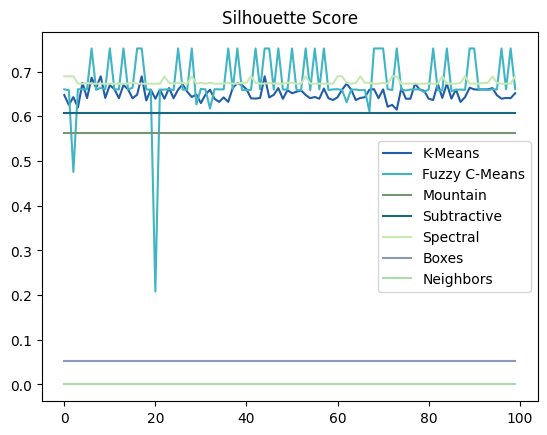

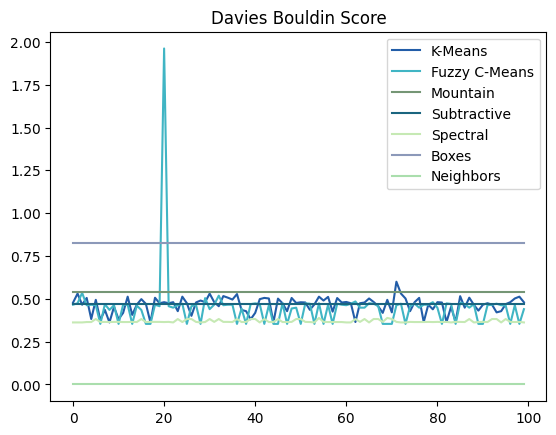

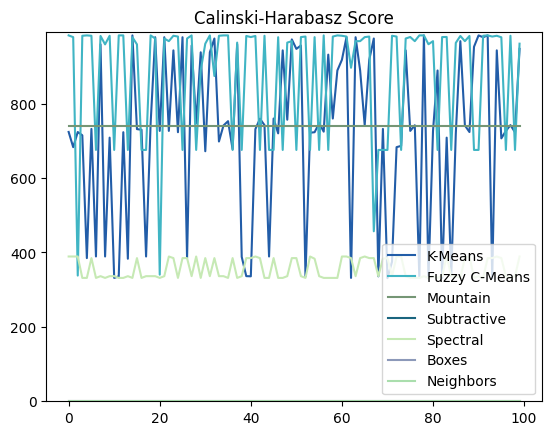

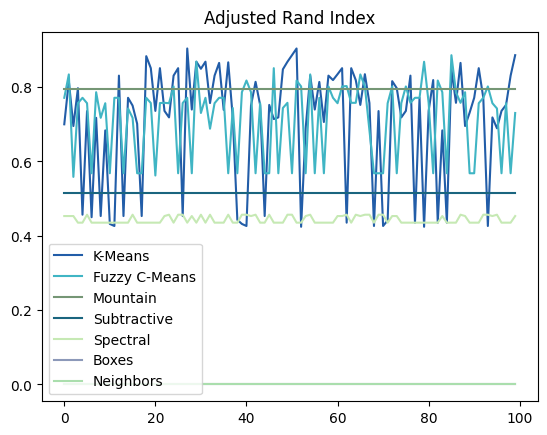

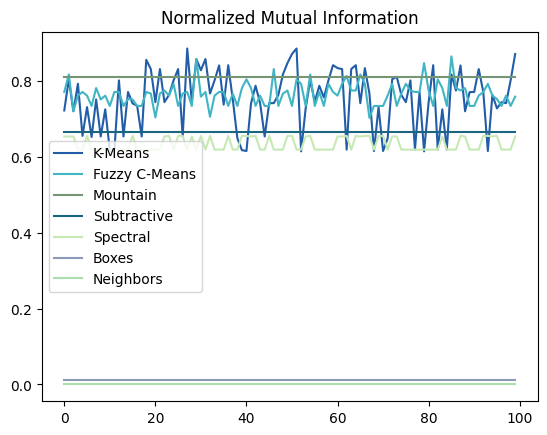

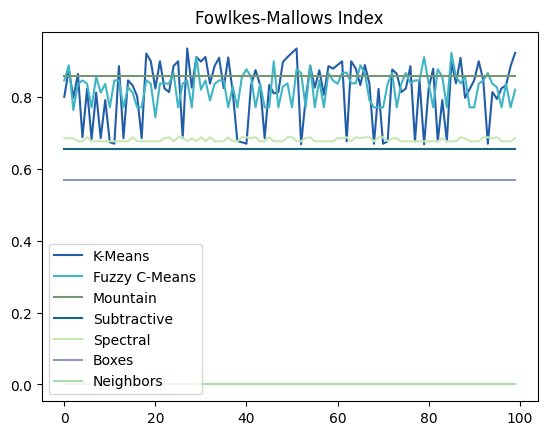

In [71]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


"#225DA8"
"#40B5C4"
"#C6E9B4"

plt.plot(kmeans_indexes[:,0], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,0], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,0], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,0], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,0], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,0], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,0], color = "#aadead", label = "Neighbors")
plt.legend()

plt.title("Silhouette Score")
plt.show()

plt.plot(kmeans_indexes[:,1], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,1], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,1], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,1], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,1], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,1], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,1], color = "#aadead", label = "Neighbors")
plt.legend()
plt.title("Davies Bouldin Score")
plt.show()

plt.plot(kmeans_indexes[:,2], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,2], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,2], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,2], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,2], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,2], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,2], color = "#aadead", label = "Neighbors")
plt.legend()
plt.ylim(0, np.max(kmeans_indexes[:,2])+10)
plt.title("Calinski-Harabasz Score")
plt.show()

plt.plot(kmeans_indexes[:,3], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,3], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,3], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,3], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,3], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,3], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,3], color = "#aadead", label = "Neighbors")
plt.legend()
plt.title("Adjusted Rand Index")
plt.show()

plt.plot(kmeans_indexes[:,4], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,4], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,4], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,4], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,4], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,4], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,4], color = "#aadead", label = "Neighbors")
plt.legend()
plt.title("Normalized Mutual Information")
plt.show()

plt.plot(kmeans_indexes[:,5], color = "#225DA8", label = "K-Means")
plt.plot(fuzzycmeans_indexes[:,5], color = "#40B5C4", label = "Fuzzy C-Means")
plt.plot(mountain_indexes[:,5], color = "#759675", label = "Mountain")
plt.plot(subtractive_indexes[:,5], color = "#1A657F", label = "Subtractive")
plt.plot(spectral_indexes[:,5], color = "#C6E9B4", label = "Spectral")
plt.plot(box_indexes[:,5], color = "#8c99b9", label = "Boxes")
plt.plot(neighbor_indexes[:,5], color = "#aadead", label = "Neighbors")
plt.legend()
plt.title("Fowlkes-Mallows Index")
plt.show()

Silhoutte Score :  0.5024177300277779
Davies Bouldin Score :  0.755815837704192
Calinski Harabasz Score :  339.01132371234115
Adjusted Rand Index :  0.6844056129203071
Normalized Mutual Information :  0.7649659696235372
Fowlkes-Mallows Index :  0.7946074670353508


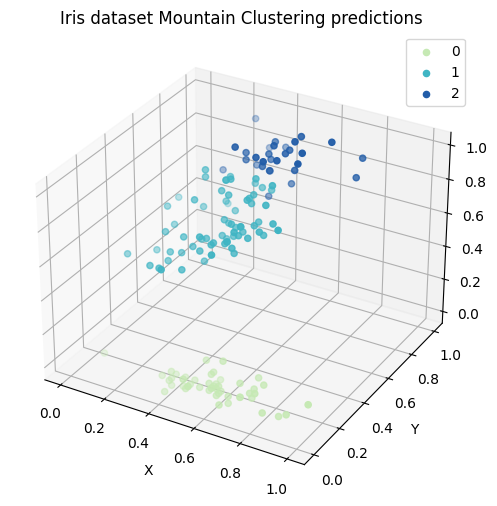

Silhoutte Score :  0.5066117585512964
Davies Bouldin Score :  0.7546318392644668
Calinski Harabasz Score :  357.554940866505
Adjusted Rand Index :  0.7445264308738749
Normalized Mutual Information :  0.7776631579462302
Fowlkes-Mallows Index :  0.8306394195437843


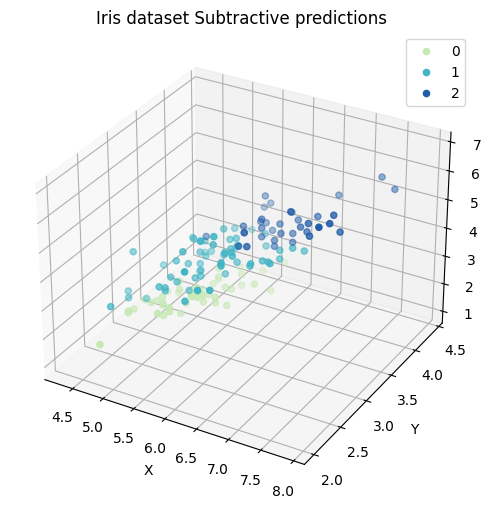

Silhoutte Score :  0.5032563362394691
Davies Bouldin Score :  0.7619136069169629
Calinski Harabasz Score :  353.7421106665186
Adjusted Rand Index :  0.7733799163281196
Normalized Mutual Information :  0.8138214462814856
Fowlkes-Mallows Index :  0.8497957418394767


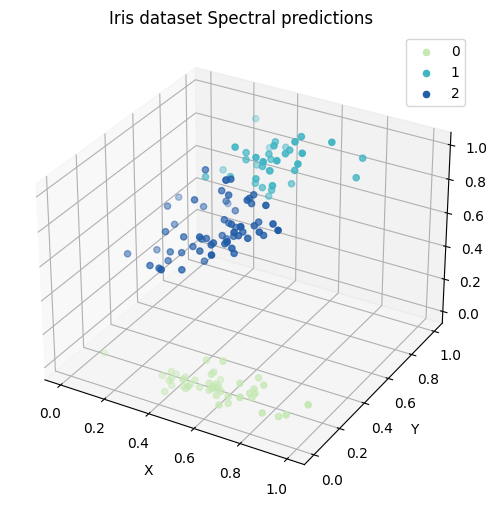

Silhoutte Score :  0.4599503361126447
Davies Bouldin Score :  0.8151746882401326
Calinski Harabasz Score :  325.27124680614884
Adjusted Rand Index :  0.8026452685653829
Normalized Mutual Information :  0.8125564476804745
Fowlkes-Mallows Index :  0.8683061950066946


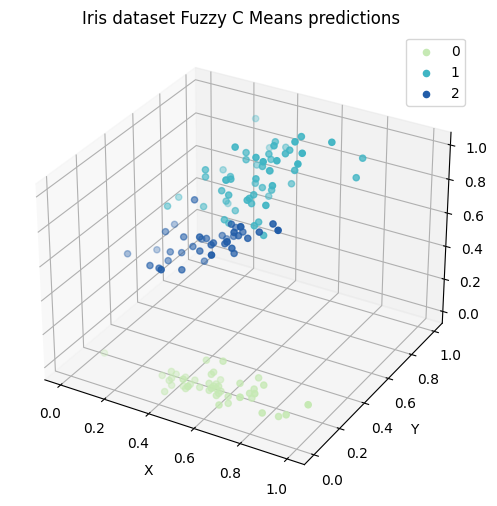

Silhoutte Score :  0.485184324610377
Davies Bouldin Score :  0.7174815227276539
Calinski Harabasz Score :  175.24005789289248
Adjusted Rand Index :  0.8026452685653829
Normalized Mutual Information :  0.8125564476804745
Fowlkes-Mallows Index :  0.8683061950066946


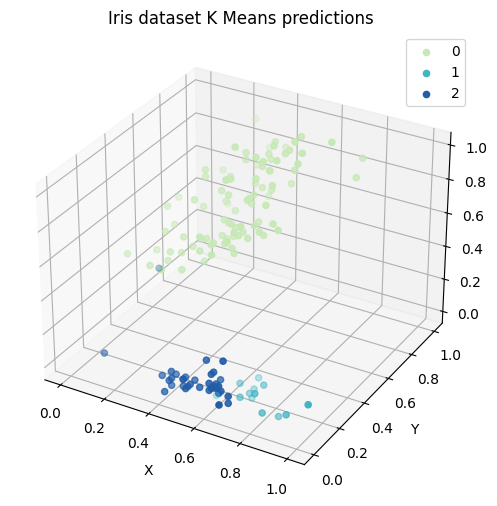

In [182]:
G = grid(dim = 4, size = 1/4)
model = MountainClustering()
mountain_clusters = model.cluster(norm_data, G, show= False) 
intra_cluster_indices(norm_data, mountain_clusters)
extra_cluster_indices(norm_data, mountain_clusters, target_clusters)
scatter_clusters(norm_data, mountain_clusters, title = "Iris dataset Mountain Clustering predictions", axis = [1,2,3])

model = SubtractiveClustering(alpha_radius=0.5, max_iterations=100)
subtractive_clusters = model.cluster(norm_data, show = False)
intra_cluster_indices(norm_data, subtractive_clusters)
extra_cluster_indices(norm_data, subtractive_clusters, target_clusters)
scatter_clusters(data, subtractive_clusters, title = "Iris dataset Subtractive predictions")

model = SpectralClustering(k=3)
spectral_clusters = model.cluster(norm_data)
intra_cluster_indices(norm_data, spectral_clusters)
extra_cluster_indices(norm_data, spectral_clusters, target_clusters)
scatter_clusters(norm_data, spectral_clusters, title = "Iris dataset Spectral predictions", axis = [1,2,3])
                 
model = FuzzyCMeansClustering(k = 3, m = 2)
fuzzycmeans_clusters = model.cluster(norm_data)
intra_cluster_indices(norm_data, fuzzycmeans_clusters)
extra_cluster_indices(norm_data, fuzzycmeans_clusters, target_clusters)
scatter_clusters(norm_data, fuzzycmeans_clusters, title = "Iris dataset Fuzzy C Means predictions", axis = [1,2,3])

model = KMeansClustering(k = 3)
kmeans_clusters = model.cluster(norm_data)
intra_cluster_indices(norm_data, kmeans_clusters)
extra_cluster_indices(norm_data, fuzzycmeans_clusters, target_clusters)
scatter_clusters(norm_data, kmeans_clusters, title = "Iris dataset K Means predictions", axis=[1,2,3])

In [189]:
import numpy as np


def confusion_matrix(target_clusters, clusters):
    
    confusion = np.zeros((len(target_clusters.keys()), len(clusters.keys())))
    confusion_df = pd.DataFrame(confusion, columns=target_clusters.keys(), index=clusters.keys())
    for target_key, target_value in target_clusters.items():
        for key, value in clusters.items():
            expected = set(target_value['points'])
            predicted = set(value['points'])

            confusion_df[target_key][key] = len(expected.intersection(predicted))
    labels = []


    for i in confusion_df:
        if list(clusters.keys())[ np.argmax(list(confusion_df[i]))] not in labels:
            labels.append(list(clusters.keys())[ np.argmax(list(confusion_df[i]))])


    return confusion_df.reindex(labels)



print(confusion_matrix(target_clusters, spectral_clusters))
print(confusion_matrix(target_clusters, mountain_clusters))
print(confusion_matrix(target_clusters, subtractive_clusters))
print(confusion_matrix(target_clusters, fuzzycmeans_clusters))
print(confusion_matrix(target_clusters, kmeans_clusters))



           cluster setosa  cluster versicolor  cluster virginica
cluster 0            49.0                 0.0                0.0
cluster 2             0.0                50.0               13.0
cluster 1             0.0                 0.0               37.0
             cluster setosa  cluster versicolor  cluster virginica
cluster 50             50.0                 0.0                0.0
cluster 312             0.0                50.0               20.0
cluster 424             0.0                 0.0               30.0
             cluster setosa  cluster versicolor  cluster virginica
cluster 7              50.0                 0.0                0.0
cluster 78              0.0                49.0               14.0
cluster 112             0.0                 1.0               36.0
           cluster setosa  cluster versicolor  cluster virginica
cluster 0            50.0                 0.0                0.0
cluster 1             0.0                40.0                1.0
cluster 2

Box Method

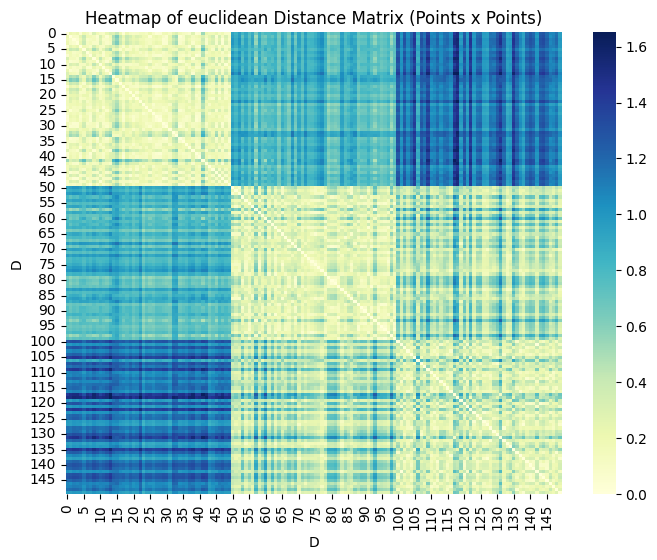

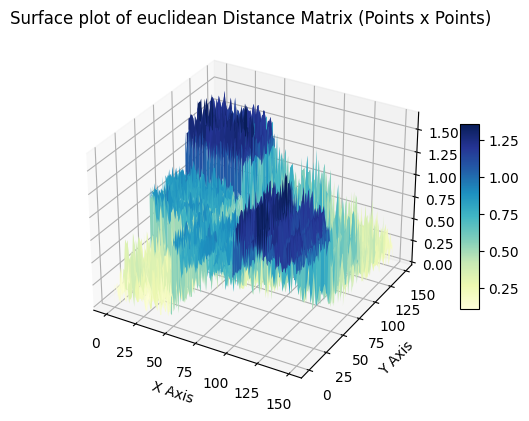

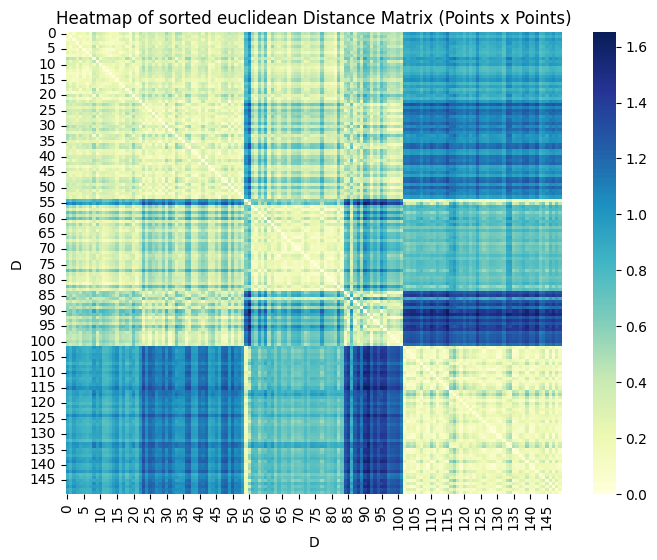

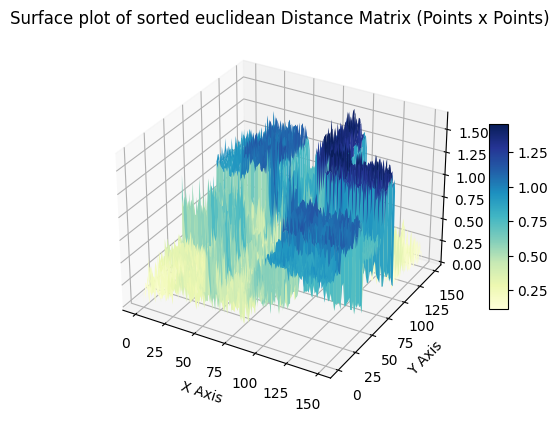

In [9]:
plotting = True
metric = 'euclidean'
clusters = 4
categorical = None
# If data contains categorical variables, use one-hot-encoding. Normalize data
if categorical != None:
    categorical_data = one_hot_encoding(data, categorical)
    norm_data = normalize(categorical_data)
else: norm_data = normalize(data)



# Calculate the distance matrix from all points to all points and plot the heatmap.
D = distance(norm_data, metric = metric)
if plotting: 
    heatmap(D, "Heatmap of "+metric+" Distance Matrix (Points x Points)") 
    surface(D, "Surface plot of "+metric+" Distance Matrix (Points x Points)")

# Sort the distance matrix using the boxes cluster criteria and plot the heatmap and surface map.
D, _, _ = sort_distances(distance(norm_data, metric = metric), div=clusters)
if plotting: 
    heatmap(D, "Heatmap of sorted "+metric+" Distance Matrix (Points x Points)")
    surface(D, "Surface plot of sorted "+metric+" Distance Matrix (Points x Points)")

vertices = grid(norm_data.shape[1], 1/2)

# Calculate the distance matrix from all vertices to all points and plot the heatmap.
D = distance(norm_data, vertices, metric = metric)
# if plotting: 
#     heatmap(D, "Heatmap of "+metric+" Distance Matrix (Vertices x Points)") 
#     surface(D, "Surface plot of "+metric+" Distance Matrix (Vertices x Points)")

Clusters = []
Metrics = ['euclidean', 'manhattan', 'cosine', 'lp']
Metrics = ['euclidean']
for met in Metrics:

    D = distance(norm_data, metric = met)

    b = boxes(D, div = clusters)
    
    M = box_clusters(b, D)
    Clusters.append(M)

    labels = neighbors(D, clusters, 0.15)

    Clusters.append(labels)



In [65]:
mountain_clusters

{'cluster 50': {'center': array([0. , 0.5, 0. , 0. ]),
  'points': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
 'cluster 312': {'center': array([0.5, 0.5, 0.5, 0.5]),
  'points': array([ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
          63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
          76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
          89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 101, 103,
         106, 110, 111, 113, 116, 119, 121, 123, 126, 127, 133, 134, 137,
         138, 142, 146, 147, 149])},
 'cluster 424': {'center': array([0.75, 0.25, 1.  , 1.  ]),
  'points': array([100, 102, 104, 105, 107, 108, 109, 112, 114, 115, 117, 118, 120,
         122, 124, 125, 128, 129, 130, 131, 132, 135, 136, 139, 140, 141,
         143, 

In [6]:
D = distance(norm_data, metric = 'euclidean')
M = box_clusters(boxes(D, div = 4), D)

{'cluster 0': {'points': [0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,
   135,